In [ ]:
# what question trying to solved?

- “What kinds of stores naturally behave similarly financially/operationally?”

In [361]:
%pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   --------------------------------------- 545.3/545.3 kB 17.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [429]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier 
import warnings
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN
import shap
import joblib

In [179]:
warnings.filterwarnings("ignore")

In [ ]:
# importing Datas and converting them into one object

In [430]:
rev=pd.read_csv(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Meta Data\Raw data\Revenue.csv")

In [433]:
sto=pd.read_csv(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Meta Data\Raw data\Stores.csv")

In [431]:
rev.head(1)

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag
0,STORE_0,756167,420498,75552,Increasing


In [437]:
rev["Store_ID"]=sto["Store_ID"]
temp_12m=rev["Total_Revenue_12mo"].copy()
temp_6m=rev["Total_Revenue_6mo"].copy()
temp_3m=rev["Total_Revenue_3mo"].copy()

for n in range(len(rev["Store_ID"])):
    t12=temp_12m[n]
    t6=temp_6m[n]
    t3=temp_3m[n]
    temp=[t12,t6,t3]
    temp.sort()  
    temp_12=temp[2]
    temp_6=temp[1]
    temp_3=temp[0]
    temp_12m[n]=temp_12
    temp_6m[n]=temp_6
    temp_3m[n]=temp_3
    temp=pd.NA

rev["Total_Revenue_12mo"]=temp_12m
rev["Total_Revenue_6mo"]=temp_6m
rev["Total_Revenue_3mo"]=temp_3m
rev.head(1)

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag
0,STORE_0,756167,420498,75552,Increasing


In [438]:
rev.drop(columns=["Store_ID","Revenue_Trend_Flag"],inplace=True)

In [439]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Total_Revenue_12mo  600 non-null    int64
 1   Total_Revenue_6mo   600 non-null    int64
 2   Total_Revenue_3mo   600 non-null    int64
dtypes: int64(3)
memory usage: 14.2 KB


In [ ]:
# preparing the data for modeling by procssing them and one-hotcoding them

In [ ]:
# pre Processing ints 

In [443]:
ints=rev.select_dtypes(include=['int64']).columns.tolist()

In [444]:
scaler=StandardScaler()

In [445]:
ints_s=scaler.fit_transform(rev[ints])

In [446]:
intspd=pd.DataFrame(ints_s,columns=scaler.get_feature_names_out(ints))

In [447]:
intspd.head()

,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo
0,0.805607,0.991755,-0.618552
1,1.282480,0.162398,-0.989735
2,1.005489,-0.245646,-0.828143
3,-0.730983,-0.088646,0.381801
4,0.229904,-0.659876,-1.039160


In [ ]:
#combine them in object x 

In [175]:
#X=pd.concat([intspd,obj_p],axis=1)

In [448]:
X=intspd

In [449]:
X.head()

,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo
0,0.805607,0.991755,-0.618552
1,1.282480,0.162398,-0.989735
2,1.005489,-0.245646,-0.828143
3,-0.730983,-0.088646,0.381801
4,0.229904,-0.659876,-1.039160


In [ ]:
#Kmeans Model for cluster

In [114]:
#Find optimal k (Elbow method)
#inertia_ - It’s the sum of squared distances of each sample to its nearest cluster center.

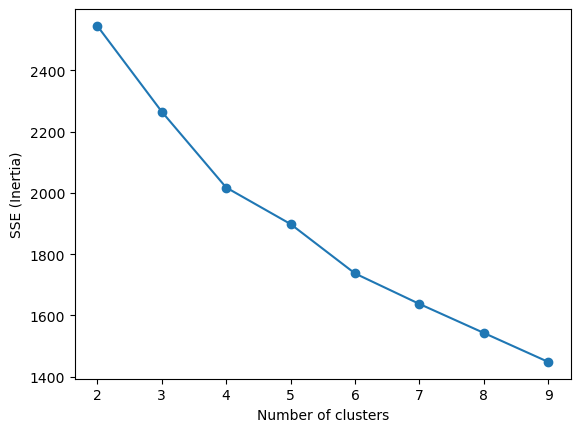

In [184]:
sse=[]
for k in range(2,10):
    km=KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(2,10),sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.show()

In [ ]:
# the number after sharp decline is the best k number. 

In [ ]:
#lets use silhouette score to get the best number or confirm what the plot is showing us 

In [ ]:
#silhoutte score 

In [183]:
km=KMeans(n_clusters=7, random_state=42)
predi=km.fit_predict(X)
score=silhouette_score(X,predi)
print(score)

0.1412849780869396


In [ ]:
# the above score is the best out of the 9. very low. need to improve should be closer t 1 or 1 not 

In [ ]:
# 2 try of Kmean

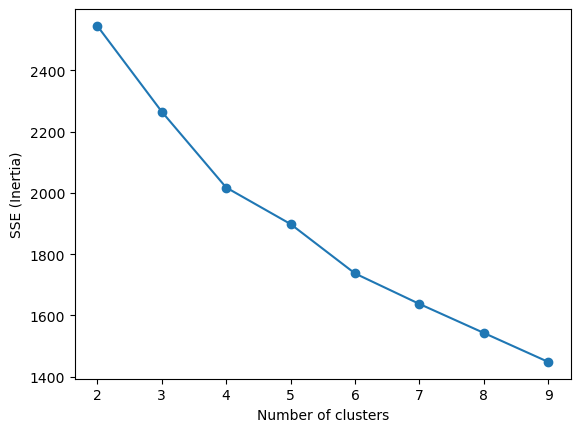

In [182]:
k2=[]
for k in range(2,10):
    km2=KMeans(n_clusters=k, random_state=42)
    km2.fit(X)
    k2.append(km2.inertia_)

plt.plot(range(2,10),k2, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.show()

In [181]:
km1=KMeans(n_clusters=, random_state=42)
predi1=km1.fit_predict(X)
score1=silhouette_score(X,predi1)
print(score1)

0.14812469601377898


In [ ]:
# k=6 is best but not good enough. 

In [ ]:
#3rd try with just revenue numbers. 

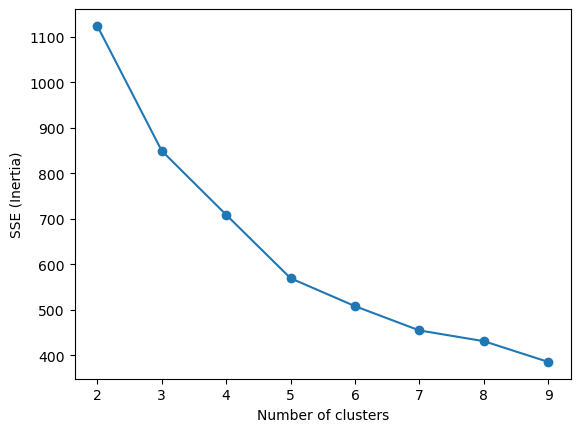

In [232]:
k3=[]
for k in range(2,10):
    km3=KMeans(n_clusters=k, random_state=42)
    km3.fit(X)
    k3.append(km3.inertia_)

plt.plot(range(2,10),k3, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.show()

In [348]:
km3=KMeans(n_clusters=3, random_state=42)
predi3=km3.fit_predict(X)
score3=silhouette_score(X,predi3)
print(score3)

0.3216067604459099


In [ ]:
#DBSCAN 

In [349]:
dbscan=DBSCAN(eps=0.5, min_samples=5)

In [350]:
dbpre=dbscan.fit_predict(X)

In [323]:
dbpre

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
        1,  2, -1,  0,  0,  0,  6,  3,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  0,  4,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,
        7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,
        0,  0,  4,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  1,  0, -1,
        0,  0,  0,  6,  0,  5,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  7,  0,  0,  0,  0,  0,  0,
        5,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  5,  0,  7,  8,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
# DBSCAN will not work because it keeps giving many differnt clussters up to 7 and many 0s. In reveneu it should not be this many clusers. 
that is why kmenas is the # winner. 

# PCA 
Think of PCA like taking a 3D object (cube) and casting its shadow on a 2D wall.

The shadow loses some detail, but keeps the main shape.
REDUCING THE MANY COLUMNS TO 2 

In [352]:
pca=PCA(n_components=2)

In [353]:
x_cpa=pca.fit_transform(X)

In [269]:
#plot


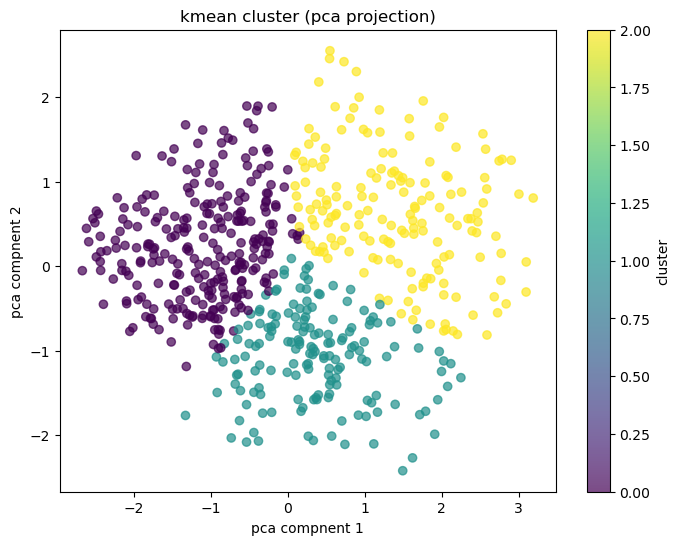

In [354]:
plt.figure(figsize=(8,6))
plt.scatter(x_cpa[:,0],x_cpa[:,1],c=predi3, cmap="viridis", alpha=0.7)
plt.xlabel("pca compnent 1")
plt.ylabel("pca compnent 2")
plt.title("kmean cluster (pca projection)")
plt.colorbar(label="cluster")
plt.show()

In [ ]:
# converting cluster numbers into catagory. 

In [ ]:
# Shape to explain the reason why the model assign the store the catagry 

In [ ]:
#first need to train to predict 

In [366]:
clf=RandomForestClassifier(random_state=42)

In [368]:
clf.fit(seg.drop("Rev_Catagory", axis=1), seg["Rev_Catagory"])

RandomForestClassifier(random_state=42)

In [369]:
#explain with shap

In [370]:
explainer=shap.Explainer(clf,seg.drop("Rev_Catagory", axis=1))

In [371]:
shap_values=explainer(seg.drop("Rev_Catagory", axis=1))

 92%|==================  | 1659/1800 [00:11<00:00]       

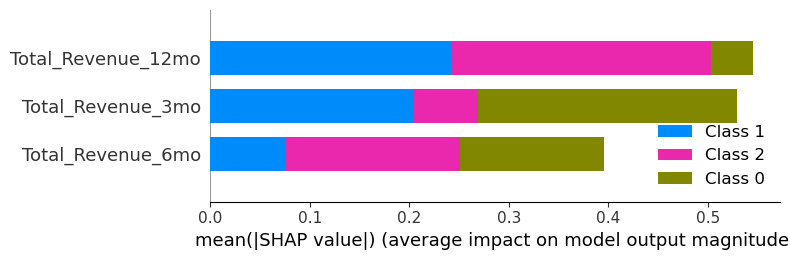

In [372]:
shap.summary_plot(shap_values,seg.drop("Rev_Catagory", axis=1))

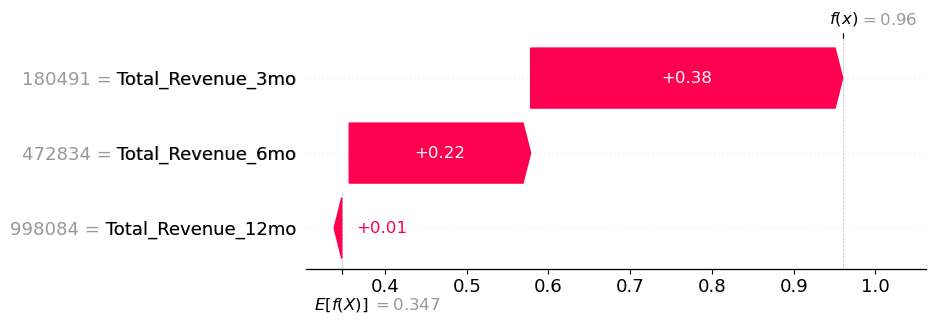

In [417]:
shap.plots.waterfall(shap_values[17,:,0])

In [383]:
print(shap_values.shape)

(600, 3, 3)


In [ ]:
# saving the model in file 

In [420]:
joblib.dump(km3,r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Notebooks\Models\kmeans.pkl")

['C:\\Users\\silve\\Desktop\\Data Science\\Projects\\Trade Franchises\\Notebooks\\Models\\kmeans.pkl']

In [421]:
load=joblib.load(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Notebooks\Models\kmeans.pkl")

In [422]:
ar=load.fit_predict(seg.drop("Rev_Catagory",axis=1))